<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240509_lec_53_challenge_more_qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'qwerty dimension 2')

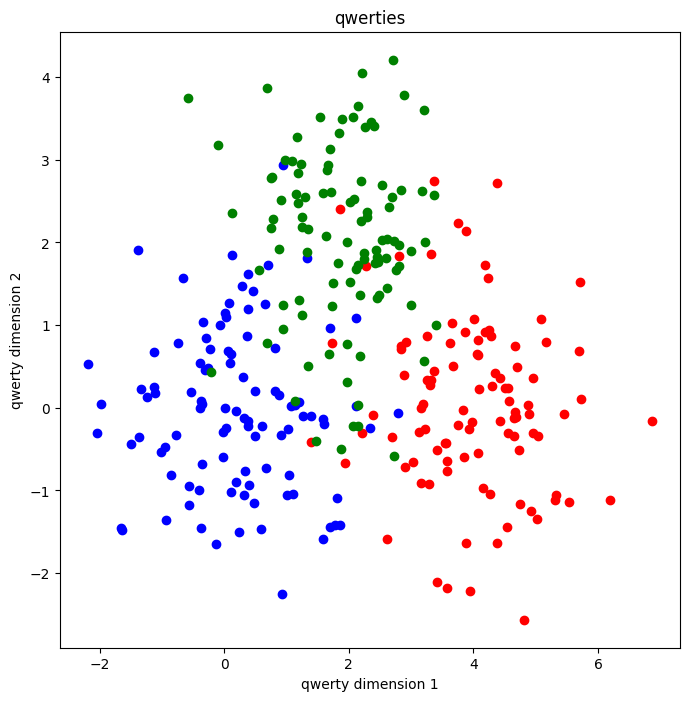

In [32]:
# a, b, c
a = [0,0]
b = [4,0]
c = [2,2]

n_cluster = 100
blur = 1

'''
리스트 형으로 하려면 torch 보단 numpy로 만든 후에 tensor로 만드는 것이 더 나음.
만약 텐서로 할 거라면 아래와 같이 만들어야 되었음.

A = torch.vstack([a[0] + torch.randn(n_cluster) * blur, a[1] + torch.randn(n_cluster) * blur])
B = torch.vstack([b[0] + torch.randn(n_cluster) * blur, b[1] + torch.randn(n_cluster) * blur])
C = torch.vstack([c[0] + torch.randn(n_cluster) * blur, c[1] + torch.randn(n_cluster) * blur])
'''

A = [a[0] + np.random.randn(n_cluster) * blur, a[1] + np.random.randn(n_cluster) * blur ]
B = [b[0] + np.random.randn(n_cluster) * blur, b[1] + np.random.randn(n_cluster) * blur ]
C = [c[0] + np.random.randn(n_cluster) * blur, c[1] + np.random.randn(n_cluster) * blur ]

data_np = np.hstack((A,B,C)).T
data = torch.tensor(data_np).float()

label_np = np.zeros((n_cluster * 3, 1))
label_np[n_cluster: 2*n_cluster] = 1
label_np[2* n_cluster:] = 2

labels = torch.squeeze(torch.tensor(label_np).long())


# where은 튜플로 만들어지나? labels의 shape는 (300) 이야 근데 np.where로 들어가면 (100,) 이런 느낌으로 들어가, 2차원인 거지 .
# np.where(labels == 1)
# torch.where(labels == 1)
plt.figure(figsize=(8,8))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels == 0)[0], 1],'bo')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels == 1)[0], 1],'ro')
plt.plot(data[np.where(labels == 2)[0],0],data[np.where(labels == 2)[0], 1],'go')
plt.title("qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")


In [36]:
ann = nn.Sequential(
            nn.Linear(2,12),
            nn.ReLU(),
            nn.Linear(12,3),
            nn.Softmax(dim = 1) # 이렇게 차원을 넣어주면 되나봐
        )
losefun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ann.parameters(),lr = .01)

In [37]:
yHat = ann(data)
yHat.shape, labels.shape

(torch.Size([300, 3]), torch.Size([300]))

In [38]:
# train
epochs = 1000
for epoch in range(epochs):
    yHat = ann(data)
    loss = losefun(yHat,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [39]:
# predict
prediction = ann(data)
predlabels = torch.argmax(prediction, axis = 1) # 0,1  중 1축을 기준으로
total_acc = 100 * torch.mean((predlabels == labels).float())
total_acc

tensor(81.6667)